#          *Data Analyst jobs visualization*

![image.png](attachment:image.png)

# About Dataset

This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description
  and more.


# Import Libraries and dataset

In [1]:
# !pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/MySkill Bootcamp MiniCase/Colab Notebooks/Session 13/DataAnalyst.csv/DataAnalyst.csv')

# Lets explore the data

In [5]:
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


**Data includes job title , salary estimation , job description , rating ,company name , location and many more ...**

# Data cleaning

### Remove the unnamed column

In [6]:
data = df.drop(['Unnamed: 0'],axis=1)
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


### Check for missing values

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [8]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Company Name,1,0.0


In [9]:
data['Easy Apply'].value_counts()

,count
Easy Apply,
-1,2173
True,80


In [10]:
data['Competitors'].value_counts()

,count
Competitors,
-1,1732
"Robert Half, Insight Global",14
"Adecco, Manpower",14
"Artech Information Systems, Mindlance, Tech Mahindra",10
"Google, Microsoft, Samsung Electronics",10
...,...
"Carr Riggs & Ingram, Cherry Bekaert, LBMC",1
"Transnational Foods, One Source Distributors",1
GE,1


In [11]:
data['Rating'].value_counts()[:5]

<ipython-input-11-f01bb0d5a42e>:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  data['Rating'].value_counts()[:5]


,count
Rating,
-1.0,272
3.9,140
3.6,135
3.7,132
5.0,131


As some of the columns contains -1 or '-1.0' or '-1' etc . We need to clean this(This is kind of null values)

Replace -1 or -1.0 or '-1' to NaN

In [12]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [13]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Easy Apply,2173,96.4
Competitors,1732,76.9
Founded,660,29.3
Industry,353,15.7
Sector,353,15.7
Rating,272,12.1
Headquarters,172,7.6
Size,163,7.2
Type of ownership,163,7.2
Revenue,163,7.2


Now you can see there are lots of missing values in the dataset. 'Easy Apply' and 'Competitors' has maximum number of missing values (> 50%)

Most companies has null values in easy apply because they are not hiring .

In [14]:
data["Company Name"].value_counts()[:5]

,count
Company Name,
"Staffigo Technical Services, LLC\n5.0",58
Diverse Lynx\n3.9,22
Kforce\n4.1,19
Lorven Technologies Inc\n4.0,19
Robert Half\n3.5,14


In [15]:
data[['Company Name', '_']] = data['Company Name'].str.split('\n', n=1, expand=True)

In [16]:
data["Company Name"].value_counts()[:5]

,count
Company Name,
"Staffigo Technical Services, LLC",58
Diverse Lynx,22
Lorven Technologies Inc,19
Kforce,19
Mondo,14


In [17]:
data['Job Title'].value_counts()[:5]

,count
Job Title,
Data Analyst,405
Senior Data Analyst,90
Junior Data Analyst,30
Business Data Analyst,28
Sr. Data Analyst,21


In [18]:
data[['Job Title', 'Department']] = data['Job Title'].str.split(',', n=1, expand=True)

In [19]:
data[['Job Title', 'Department']].value_counts()[:5]

,,count
Job Title,Department,
Data Analyst,Data & Analytics (Advanced Analytics) Manager (Multiple Positions),4
Analyst,Financial Master Data,3
Senior Analyst,Data Instrumentation & Quality (Disney+),2
Lead Data Analyst,Product,2
Data Analyst 3,Customer Experience,2


In [20]:
data['Salary Estimate'].value_counts()[:5]

,count
Salary Estimate,
$42K-$76K (Glassdoor est.),57
$41K-$78K (Glassdoor est.),57
$50K-$86K (Glassdoor est.),41
$35K-$67K (Glassdoor est.),33
$43K-$76K (Glassdoor est.),31


In [21]:
data[['Salary Estimate', 'Estimate Source']] = data['Salary Estimate'].str.split('(', n=1, expand=True)

# Menghapus tanda kurung yang tersisa di kolom 'Estimate Source'
data['Estimate Source'] = data['Estimate Source'].str.replace(')', '', regex=False)
data['Estimate Source'].value_counts()[:5]

,count
Estimate Source,
Glassdoor est.,2252


In [22]:
data['Salary Estimate'].value_counts()[:5]

,count
Salary Estimate,
$42K-$76K,57
$41K-$78K,57
$50K-$86K,41
$35K-$67K,33
$43K-$76K,31


In [23]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,_,Department,Estimate Source
0,Data Analyst,$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,3.2,Center on Immigration and Justice (CIJ),Glassdoor est.
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,3.8,None,Glassdoor est.
2,Senior Data Analyst,$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,3.4,Insights & Analytics Team [Customer Operations],Glassdoor est.
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,4.1,None,Glassdoor est.
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,3.9,None,Glassdoor est.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,2.5,None,Glassdoor est.
2249,Senior Data Analyst (Corporate Audit),$78K-$104K,Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,2.9,None,Glassdoor est.
2250,Technical Business Analyst (SQL,$78K-$104K,"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"Data analytics, ETL)",Glassdoor est.
2251,Data Analyst 3,$78K-$104K,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,3.1,Customer Experience,Glassdoor est.


#### Split salary into two columns min salary and max salary.

In [24]:
data['Salary Estimate'].value_counts()[:2]

,count
Salary Estimate,
$42K-$76K,57
$41K-$78K,57


In [25]:
# Pisahkan kolom Salary Estimate menjadi Min dan Max berdasarkan tanda "-"
data[['Min_Salary', 'Max_Salary']] = data['Salary Estimate'].str.split('-', expand=True)

In [26]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,_,Department,Estimate Source,Min_Salary,Max_Salary
0,Data Analyst,$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,3.2,Center on Immigration and Justice (CIJ),Glassdoor est.,$37K,$66K
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,3.8,None,Glassdoor est.,$37K,$66K
2,Senior Data Analyst,$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,3.4,Insights & Analytics Team [Customer Operations],Glassdoor est.,$37K,$66K
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,4.1,None,Glassdoor est.,$37K,$66K
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,3.9,None,Glassdoor est.,$37K,$66K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,2.5,None,Glassdoor est.,$78K,$104K
2249,Senior Data Analyst (Corporate Audit),$78K-$104K,Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,2.9,None,Glassdoor est.,$78K,$104K
2250,Technical Business Analyst (SQL,$78K-$104K,"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"Data analytics, ETL)",Glassdoor est.,$78K,$104K
2251,Data Analyst 3,$78K-$104K,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,3.1,Customer Experience,Glassdoor est.,$78K,$104K


In [27]:
data['Min_Salary'].isnull().sum()

1

In [28]:
data['Min_Salary'].str.len()

,Min_Salary
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
...,...
2248,4.0
2249,4.0
2250,4.0
2251,4.0


In [29]:
data['Max_Salary'].isnull().sum()

1

In [30]:
data['Max_Salary'].str.len()

,Max_Salary
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
2248,6.0
2249,6.0
2250,6.0
2251,6.0


In [31]:
# Mengambil baris dengan nilai kosong di Max_Salary dan Min_Salary
empty_salaries = data[data['Max_Salary'].isnull() & data['Min_Salary'].isnull()]

# Menampilkan hasil
empty_salaries

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,_,Department,Estimate Source,Min_Salary,Max_Salary
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN,4.4,None,NaN,NaN,NaN


In [32]:
# Mengganti NaN dengan 0 di kolom Min_Salary dan Max_Salary
data['Min_Salary'] = data['Min_Salary'].fillna('0')
data['Max_Salary'] = data['Max_Salary'].fillna('0')

# Menghapus simbol $ dan mengganti K dengan 000
data['Min_Salary'] = data['Min_Salary'].str.replace('$', '').str.replace('K', '000')
data['Max_Salary'] = data['Max_Salary'].str.replace('$', '').str.replace('K', '000')

In [33]:
# Ubah Min_Salary dan Max_Salary ke tipe data integer
data['Min_Salary'] = data['Min_Salary'].astype(int)
data['Max_Salary'] = data['Max_Salary'].astype(int)

In [34]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,_,Department,Estimate Source,Min_Salary,Max_Salary
0,Data Analyst,$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,3.2,Center on Immigration and Justice (CIJ),Glassdoor est.,37000,66000
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,3.8,None,Glassdoor est.,37000,66000
2,Senior Data Analyst,$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,3.4,Insights & Analytics Team [Customer Operations],Glassdoor est.,37000,66000
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,4.1,None,Glassdoor est.,37000,66000
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,3.9,None,Glassdoor est.,37000,66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,2.5,None,Glassdoor est.,78000,104000
2249,Senior Data Analyst (Corporate Audit),$78K-$104K,Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,2.9,None,Glassdoor est.,78000,104000
2250,Technical Business Analyst (SQL,$78K-$104K,"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"Data analytics, ETL)",Glassdoor est.,78000,104000
2251,Data Analyst 3,$78K-$104K,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,3.1,Customer Experience,Glassdoor est.,78000,104000


In [35]:
data.drop(['Salary Estimate'],axis=1,inplace=True)

# Current openings

In [36]:
data['Easy Apply']=data['Easy Apply'].fillna(False).astype('bool')

In [37]:
df_easy_apply=data[data['Easy Apply']==True]
df=df_easy_apply.groupby('Company Name')['Easy Apply'].count().reset_index()
company_opening_df=df.sort_values('Easy Apply',ascending=False).head(10)

<ipython-input-38-022029b8c91f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(
<ipython-input-38-022029b8c91f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart=chart.set_xticklabels(


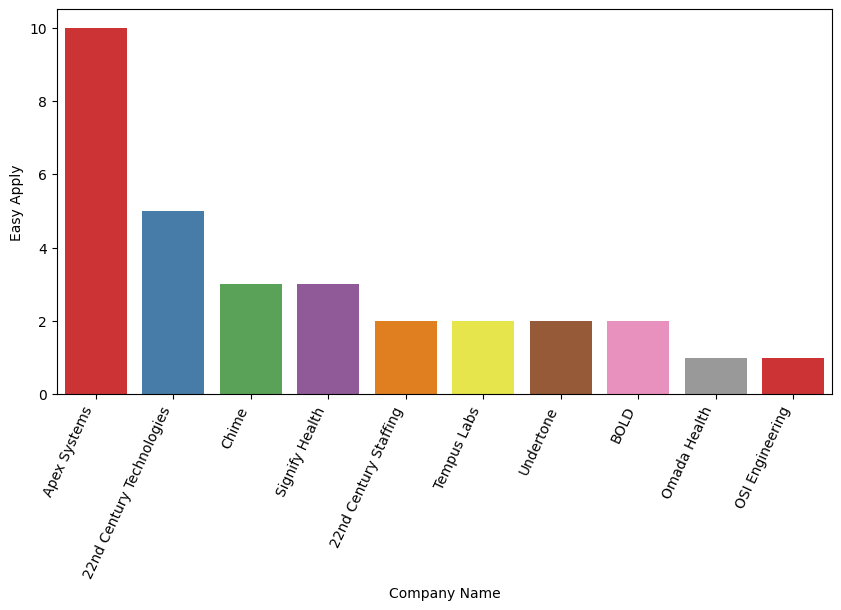

In [38]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=company_opening_df,
    x='Company Name',
    y='Easy Apply',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',


)

**These are the top 10 companies hiring for Data analyst roles**

# Salary Distribution of Data Analyst

<ipython-input-39-db046f29fe70>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_analyst['Min_Salary'], color="b", ax=axes[0])
<ipython-input-39-db046f29fe70>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_analyst['Max_Salary'], color="r",ax=axes[1])


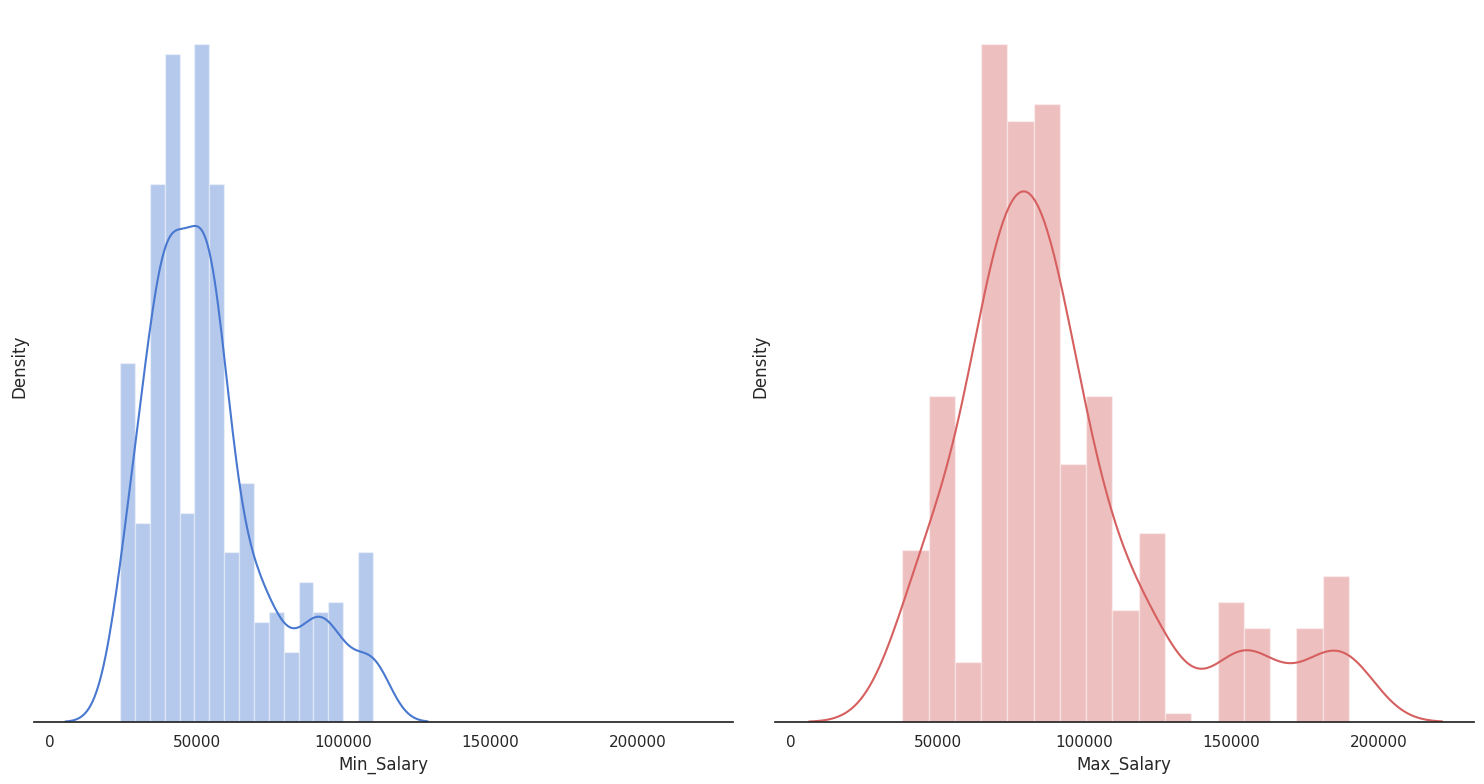

In [39]:
data_analyst = data[data['Job Title']=='Data Analyst']


sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)

#Plot a histogram and kernel density estimate

sns.distplot(data_analyst['Min_Salary'], color="b", ax=axes[0])

sns.distplot(data_analyst['Max_Salary'], color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# Top 20 cities with their minimum and maximum salaries

In [40]:
df=data.groupby('Location')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

In [41]:

fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['Min_Salary'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['Max_Salary'],name='Maximum Salary'))

fig.update_layout(title='Top 20 cities with their minimum and maximum salaries',barmode='stack')

fig.show()

# Top 20 Roles with their minimum and maximum salaries

In [42]:
df=data.groupby('Job Title')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)

In [43]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['Min_Salary'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['Max_Salary'],name='Maximum Salary'))

fig.update_layout(title='Top 20 Roles with their minimum and maximum salaries',barmode='stack')

fig.show()

# Size of Employees Vs No of Companies

In [44]:
df=data['Size'].value_counts()

In [45]:
df=pd.DataFrame(df)
df['employee_size']=df.index

In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
df=df.rename(columns={"count": "No_of_companies"})

In [48]:
df

,No_of_companies,employee_size
0,421,51 to 200 employees
1,375,10000+ employees
2,348,1001 to 5000 employees
3,347,1 to 50 employees
4,249,201 to 500 employees
5,211,501 to 1000 employees
6,97,5001 to 10000 employees
7,42,Unknown


<ipython-input-49-baa5e9078461>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-49-baa5e9078461>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



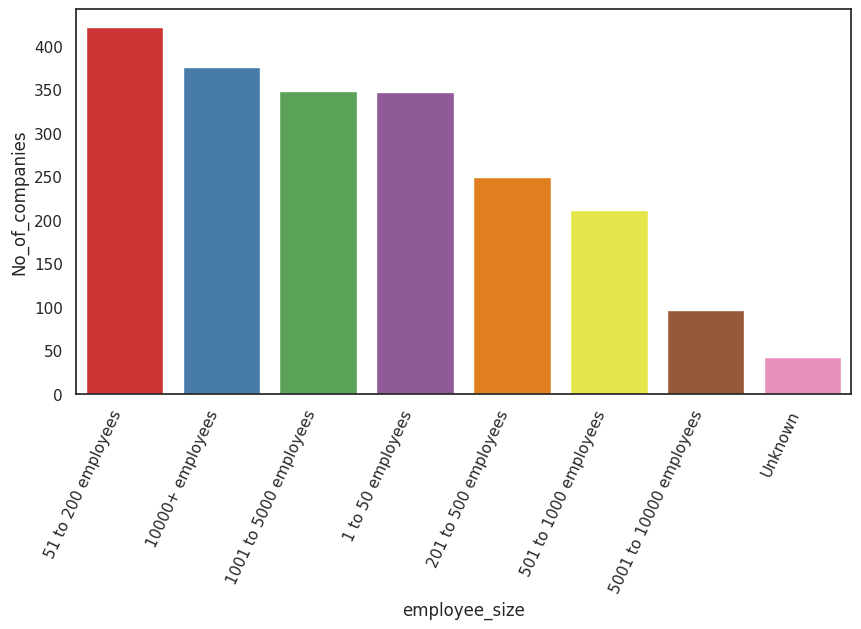

In [49]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='employee_size',
    y='No_of_companies',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',

)

**maximum companies having size 1-200 or 5000**

# Revenue of different sectors

In [50]:
def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue


In [51]:
data['Max_revenue']=data['Revenue'].apply(lambda x: filter_revenue(x))

In [52]:
df=data.groupby('Sector')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [53]:
df.reset_index(inplace=True)

In [54]:
df

,Sector,Max_revenue
0,Insurance,5465.196078
1,Mining & Metals,5000.000000
2,Aerospace & Defense,4884.090909
3,Telecommunications,4778.181818
4,Finance,4653.881657
5,Retail,4447.394737
6,Manufacturing,4382.625000
7,Media,3837.880952
8,Transportation & Logistics,3080.000000
9,Biotech & Pharmaceuticals,2835.636364


<ipython-input-55-a8f2ff0550ef>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



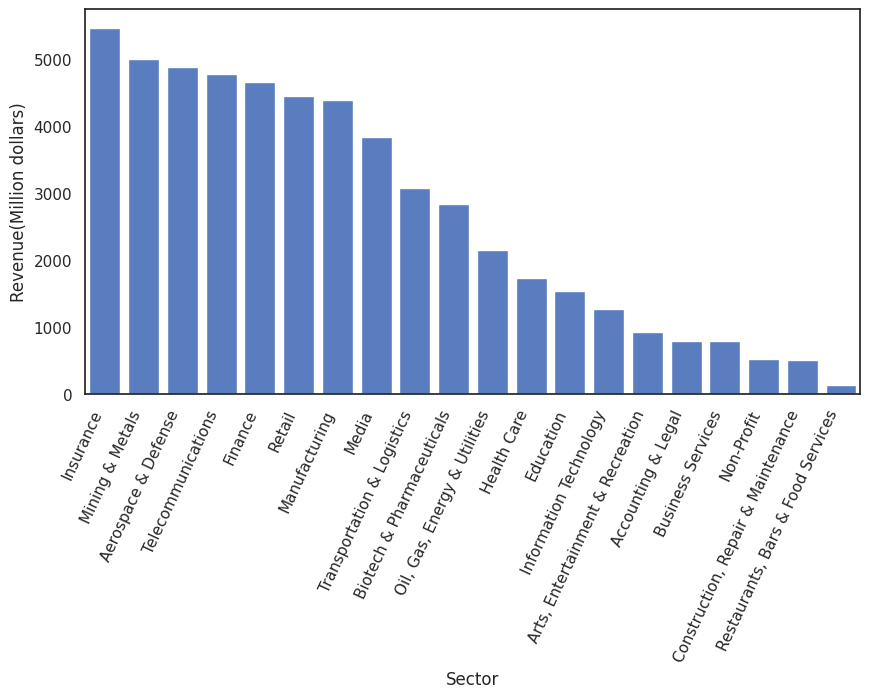

In [55]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Sector',
    y='Max_revenue'
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',

)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")


As you can see from the graph **highest revenue** is from **Art,Entertainment and recreation**

# Revenue of different Industries

In [56]:
df=data.groupby('Industry')[['Max_revenue']].mean().sort_values(['Max_revenue'],ascending=False).head(20)

In [57]:
df.reset_index(inplace=True)

<ipython-input-58-a0d33cc7479e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-58-a0d33cc7479e>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



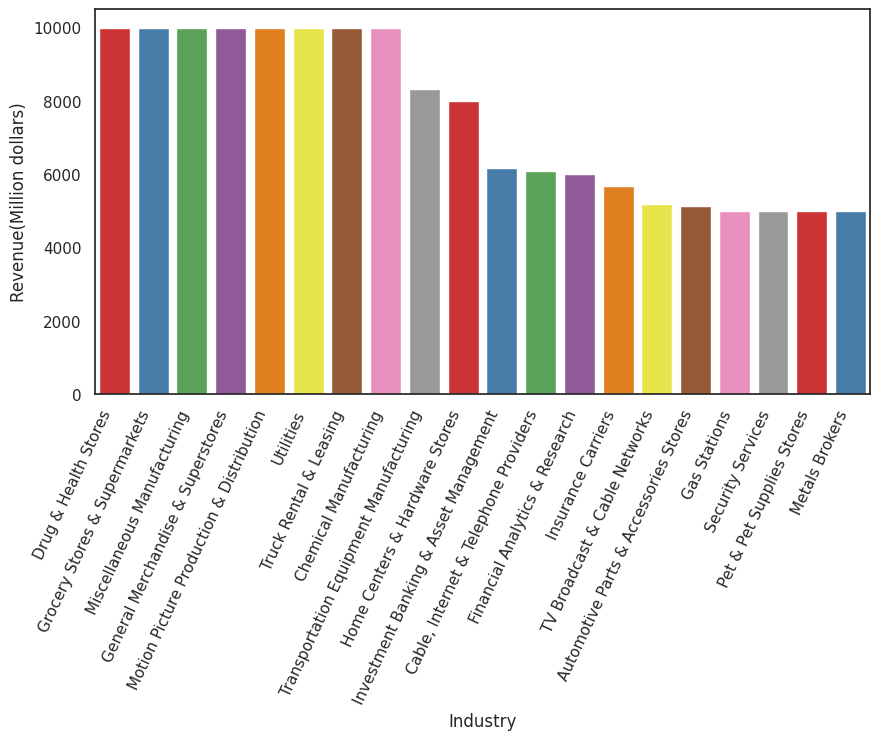

In [58]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Industry',
    y='Max_revenue',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',

)
chart.axes.yaxis.label.set_text("Revenue(Million dollars)")

# Word Cloud of job Title

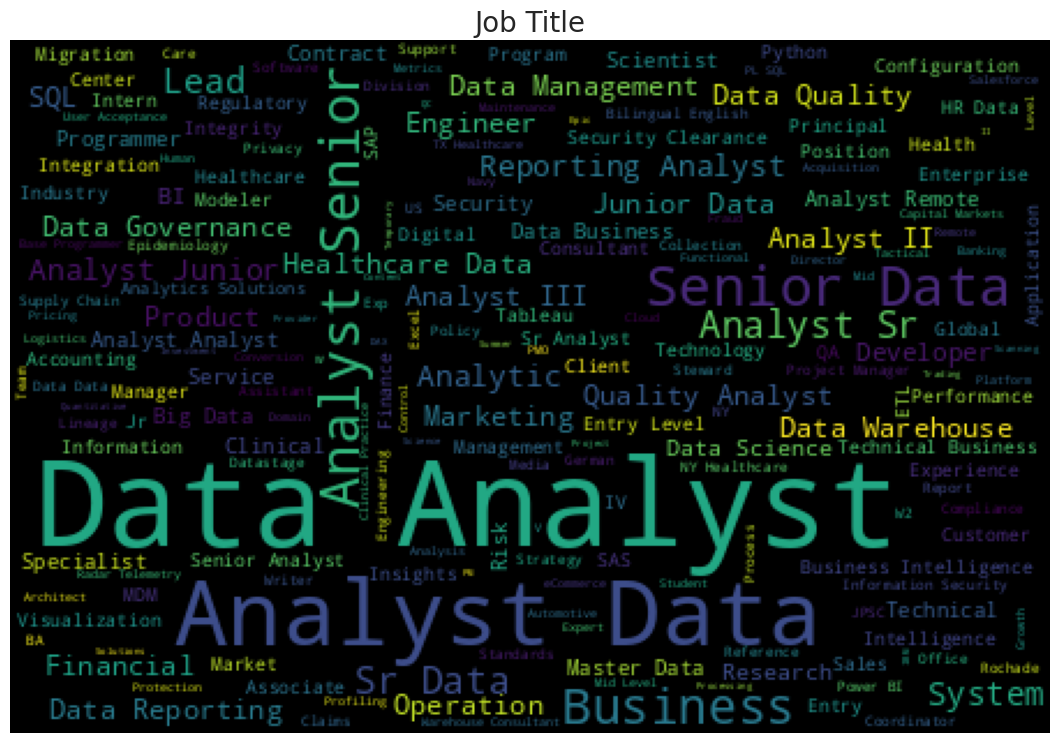

In [59]:
job_title=data['Job Title'][~pd.isnull(data['Job Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

# Ratings

In [60]:
count=data.groupby('Rating')['Company Name'].count()

In [61]:
df=pd.DataFrame(count).rename(columns={'Company Name': 'Count'}).reset_index()

In [62]:
df=df.sort_values('Rating',ascending=False).head(20)

<ipython-input-63-86fb029c2863>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-63-86fb029c2863>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



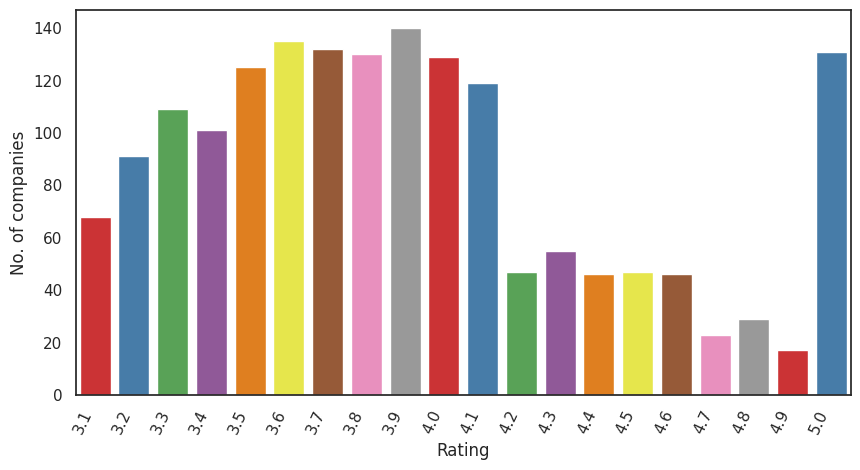

In [63]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Rating',
    y='Count',
    palette='Set1'
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',

)
chart.axes.yaxis.label.set_text("No. of companies")

# Industries with their Average minimum and maximum salaries

In [64]:
df=data.groupby('Industry')[['Min_Salary','Max_Salary']].mean().rename(columns={'Min_Salary':'Avg_min_salary','Max_Salary':'Avg_max_salary'})

In [65]:
df=df.reset_index()

In [66]:
df=df.sort_values(['Avg_max_salary','Avg_max_salary'],ascending=False)

In [67]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.Industry,y=df['Avg_min_salary'],name='Average Minimum salary'))
fig.add_trace(go.Bar(x=df.Industry,y=df['Avg_max_salary'],name='Average Maximum Salary'))

fig.update_layout(title='Industries with their Average minimum and maximum salaries',barmode='stack')

fig.show()

# Jobs with Openings

In [68]:
df=pd.DataFrame(data[data['Easy Apply']==True]['Job Title'].value_counts()).rename(columns={'count':'No_of_openings'})

In [69]:
df=df.reset_index().rename(columns={'index':'Job Title'})

In [70]:
df=df.head(10)

In [71]:
df

,Job Title,No_of_openings
0,Data Analyst,17
1,Senior Data Analyst,8
2,Senior Data Quality Analyst,2
3,Data Base Programmer/Analyst,2
4,Senior Product Data Analyst,2
5,Lead Data Analyst,2
6,Senior Analyst,2
7,Data Validation Analyst,1
8,Data Analyst - Sr,1
9,AI Insights Data Analyst,1


<ipython-input-72-c50f0f54ea84>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-72-c50f0f54ea84>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



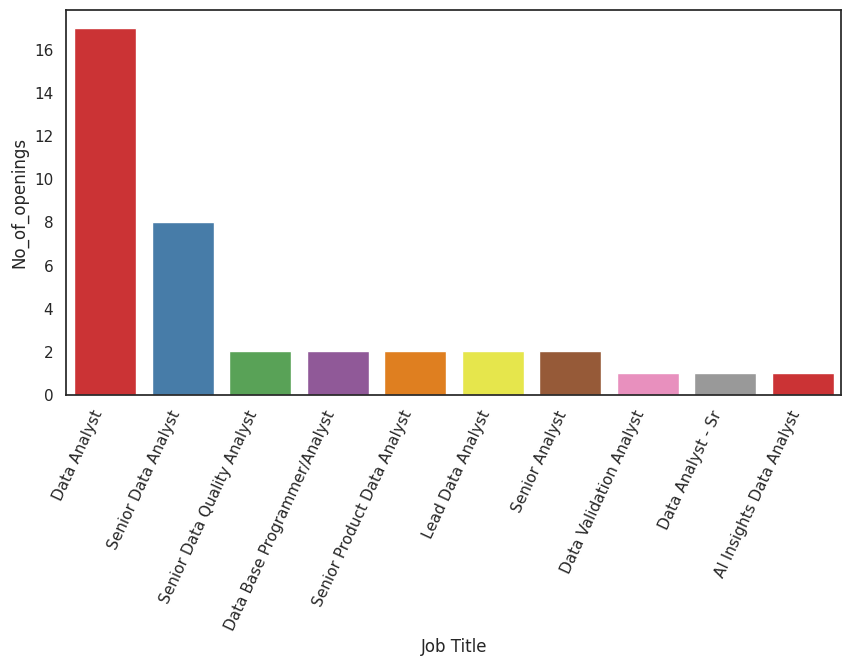

In [72]:
plt.figure(figsize=(10,5))

chart = sns.barplot(
    data=df,
    x='Job Title',
    y='No_of_openings',
    palette='Set1'
)

chart=chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=65,
    horizontalalignment='right',
    fontweight='light',
)


# If you like my work do UPVOTE